## Imports

In [40]:
import pandas as pd
import sqlite3

## Make a connection to the database

In [41]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Analyze only the users and not the admins
• analyze only the dates when there were both views and checker commits • use size of the font should be 8
• the size of the figure is (15,8)

In [42]:
sel = """
    SELECT datetime FROM pageviews
    WHERE uid LIKE 'user_%';"""

dt_df = pd.read_sql(sel, conn, parse_dates=['datetime'])
dt_df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [43]:
sel = """
    SELECT timestamp FROM checker
    WHERE uid LIKE 'user_%';"""

com_df = pd.read_sql(sel, conn, parse_dates=['timestamp'])
com_df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [44]:
dt_by_day = dt_df.groupby(by=[dt_df.datetime.dt.date]).count()
dt_by_day.rename(columns={'datetime': 'views'}, inplace=True)
dt_by_day.index.rename('date', inplace=True)
dt_by_day.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [45]:
com_by_day = com_df.groupby(by=[com_df.timestamp.dt.date]).count()
com_by_day.rename(columns={'timestamp': 'commits'}, inplace=True)
com_by_day.index.rename('date', inplace=True)
com_by_day.head()

,commits
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


In [46]:
full_df = dt_by_day.join(com_by_day, on='date', how='inner')
full_df.head()

,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28


<AxesSubplot:title={'center':'Views and commits per day'}, xlabel='date'>

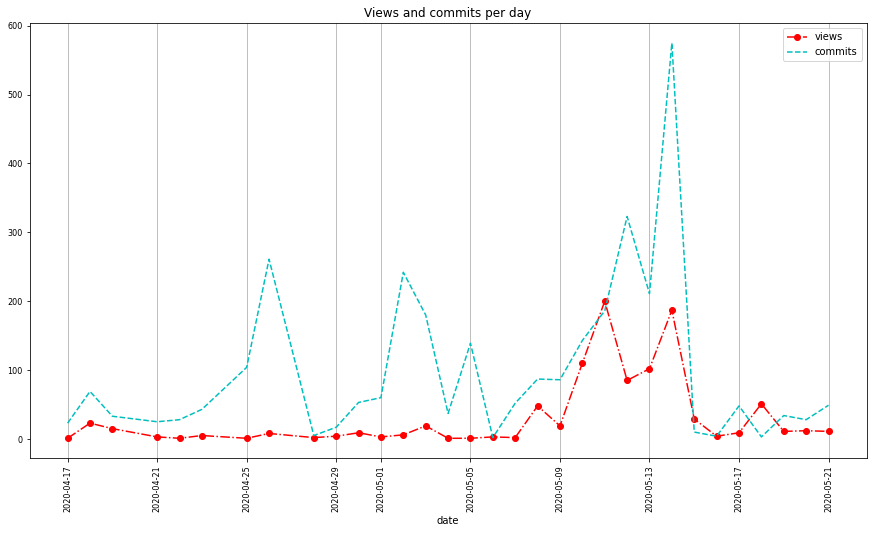

In [47]:
plt = full_df.plot(figsize=(15, 8),
                   fontsize=8,
                   title='Views and commits per day',
                   rot=90,
                   style={'views': 'r.-.', 'commits': 'c--'},
                   markersize=12)
plt.grid(axis='x')
plt

In [48]:
conn.close()

## How many times was the number of views larger than 150?

The answer is 2